In [4]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.9,
    0.1,
    0.61
]

roc_auc_score(y_true, y_predictions)

1.0

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных 

In [45]:
data = pd.read_csv('train_dp.csv')

In [46]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'
data.head(15)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [48]:
data = data.replace('?', np.nan)

data = data.dropna()

In [49]:
data.shape

(5282, 20)

## Анализ данных 

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


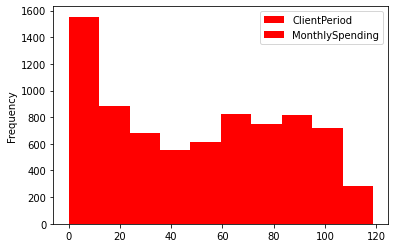

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
numeric_data = data[num_cols]
numeric_data.plot(kind='hist', 
           color='red')
categorial_data = data[cat_cols]
categorial_data

In [51]:
bad_data = data[data['TotalSpent'] == " "]
len(bad_data)

9

In [52]:
data = data[data['TotalSpent'] != " "]

In [53]:
data = data.reset_index()
data.loc[1048, 'TotalSpent']

'3656.25'

In [54]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

## Применение линейных моделей

In [55]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [56]:
dummy_features = pd.get_dummies(data[cat_cols], drop_first=True)
data_for_LRCV = pd.concat([data[num_cols], dummy_features], axis=1)
print(data_for_LRCV.columns)
data_for_LRCV.head()

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen',
       'Sex_Male', 'HasPartner_Yes', 'HasChild_Yes', 'HasPhoneService_Yes',
       'HasMultiplePhoneNumbers_No phone service',
       'HasMultiplePhoneNumbers_Yes', 'HasInternetService_Fiber optic',
       'HasInternetService_No', 'HasOnlineSecurityService_No internet service',
       'HasOnlineSecurityService_Yes', 'HasOnlineBackup_No internet service',
       'HasOnlineBackup_Yes', 'HasDeviceProtection_No internet service',
       'HasDeviceProtection_Yes', 'HasTechSupportAccess_No internet service',
       'HasTechSupportAccess_Yes', 'HasOnlineTV_No internet service',
       'HasOnlineTV_Yes', 'HasMovieSubscription_No internet service',
       'HasMovieSubscription_Yes', 'HasContractPhone_One year',
       'HasContractPhone_Two year', 'IsBillingPaperless_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,1,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,75.90,75.90,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,32,79.30,2570.00,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(data_for_LRCV, 
                                                    data[target_col], 
                                                    train_size=0.8,
                                                    random_state=42)

In [58]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
LRCV = LogisticRegressionCV(cv=5, n_jobs=-1, scoring='roc_auc')
LRCV.fit(X_train, y_train)
print(LRCV.score(X_train, y_train), LRCV.score(X_test, y_test))

0.847360763432601 0.8441047416843596


## Применение градиентного бустинга 

In [21]:
import catboost

In [22]:
X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split(data[cat_cols + num_cols],
                                                                data[target_col], 
                                                                train_size=0.8,
                                                                random_state=42)
X_train_CB

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,ClientPeriod,MonthlySpending,TotalSpent
2980,Female,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),69,24.60,1678.05
4157,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,22,50.60,1073.30
5090,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),45,54.65,2553.70
295,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),4,70.90,273.00
1121,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),12,21.05,235.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),54,20.05,1102.40
3772,Female,0,No,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),41,45.20,1841.90
5191,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),13,30.85,394.10
5226,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46,72.80,3249.40


In [64]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols,
                                             learning_rate=0.15,
                                             max_leaves=25,
                                             depth=3,
                                             grow_policy='Lossguide',
                                             custom_metric='AUC',
                                             min_data_in_leaf=90,
                                             silent=True)

boosting_model.fit(X_train_CB, y_train_CB)

y_train_predicted = boosting_model.predict_proba(X_train_CB)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_CB)[:, 1]

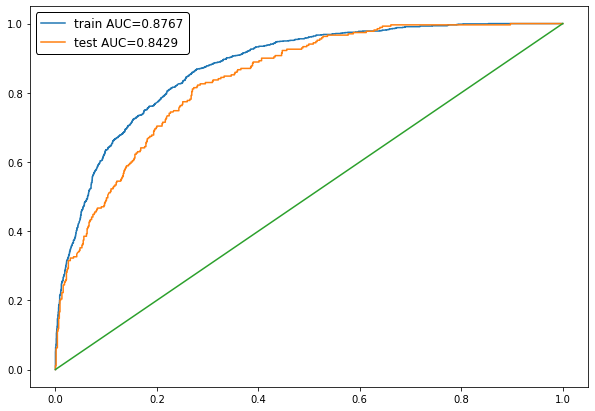

In [65]:
from sklearn.metrics import roc_curve
train_auc = roc_auc_score(y_train_CB, y_train_predicted)
test_auc = roc_auc_score(y_test_CB, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_CB, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test_CB, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Предсказания

In [66]:
X_test = pd.read_csv('test_dp.csv')
submission = pd.read_csv('submission.csv')
submission['Churn'] = boosting_model.predict_proba(X_test[cat_cols + num_cols])[:, 1]
submission.to_csv('my_submission.csv',index = False)